# Convolutional Neural Network

### Importing the libraries

In [28]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import os


In [29]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True)
 

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 4000 images belonging to 2 classes.


### Preprocessing the Test set

In [31]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('data/valid',
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 400 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [32]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

### Step 2 - Pooling

In [34]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [38]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.5))

### Step 4 - Full Connection

In [39]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

### Step 5 - Output Layer

In [40]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [41]:
cnn.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 1, steps_per_epoch=63,validation_steps=7, workers=4)


Epoch 1/5
63/63 [==============================] - 326s 5s/step - loss: 0.7622 - accuracy: 0.6837 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2/5
63/63 [==============================] - 295s 5s/step - loss: 0.1628 - accuracy: 0.9379 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 3/5
63/63 [==============================] - 290s 5s/step - loss: 0.1018 - accuracy: 0.9593 - val_loss: 0.0790 - val_accuracy: 1.0000
Epoch 4/5
63/63 [==============================] - 291s 5s/step - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 5/5
63/63 [==============================] - 293s 5s/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0155 - val_accuracy: 1.0000


In [42]:
cnn.save('cnn.h5')

## Part 4 - Making a single prediction

In [43]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('data/single_pred/394.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'ME'
else:
  prediction = 'NOBODY'

In [44]:
print(prediction)

ME


<function matplotlib.pyplot.show(*args, **kw)>

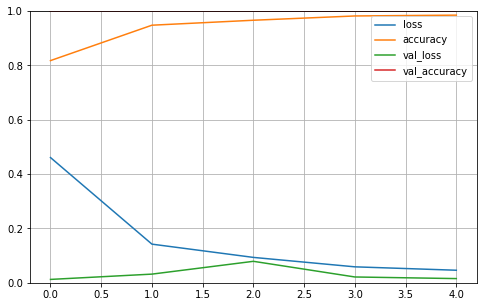

In [45]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show